In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

2025-01-28 02:28:09.850873: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

$\Large{\text{Loading the data (source: https://www.kaggle.com/competitions/nomad2018-predict-transparent-conductors/data)}}$

In [171]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [172]:
data

id  spacegroup  number_of_total_atoms  percent_atom_al  \
0        1          33                   80.0           0.6250   
1        2         194                   80.0           0.6250   
2        3         227                   40.0           0.8125   
3        4         167                   30.0           0.7500   
4        5         194                   80.0           0.0000   
...    ...         ...                    ...              ...   
2395  2396          33                   40.0           0.7500   
2396  2397         167                   30.0           0.4167   
2397  2398         206                   80.0           0.4375   
2398  2399          33                   80.0           0.3125   
2399  2400         206                   80.0           0.8750   

      percent_atom_ga  percent_atom_in  lattice_vector_1_ang  \
0              0.3750           0.0000                9.9523   
1              0.3750           0.0000                6.1840   
2              0.1875           0.0000                9.7510   
3              0.0000           0.2500                5.0036   
4              0.6250           0.3750                6.6614   
...               ...              ...                   ...   
2395           0.2500           0.0000                4.9469   
2396           0.5833           0.0000                4.9566   
2397           0.5625           0.0000                9.2204   
2398           0.1875           0.5000               10.6529   
2399           0.0938           0.0312                9.0648   

      lattice_vector_2_ang  lattice_vector_3_ang  lattice_angle_alpha_degree  \
0                   8.5513                9.1775                     90.0026   
1                   6.1838               23.6287                     90.0186   
2                   5.6595               13.9630                     90.9688   
3                   5.0034               13.5318                     89.9888   
4                   6.6612               24.5813                     89.9960   
...                    ...                   ...                         ...   
2395                8.5014                9.1298                     90.0038   
2396                4.9562               13.4178                     89.9938   
2397                9.2200                9.2199                     90.0047   
2398                9.0954                9.7210                     90.0015   
2399                9.0641                9.0643                     90.0027   

      lattice_angle_beta_degree  lattice_angle_gamma_degree  \
0                       90.0023                     90.0017   
1                       89.9980                    120.0025   
2                       91.1228                     30.5185   
3                       90.0119                    120.0017   
4                       90.0006                    119.9893   
...                         ...                         ...   
2395                    90.0023                     90.0015   
2396                    90.0075                    120.0007   
2397                    90.0046                     89.9954   
2398                    89.9996                     90.0004   
2399                    90.0037                     89.9987   

      formation_energy_ev_natom  bandgap_energy_ev  
0                        0.0680             3.4387  
1                        0.2490             2.9210  
2                        0.1821             2.7438  
3                        0.2172             3.3492  
4                        0.0505             1.3793  
...                         ...                ...  
2395                     0.0381             3.7349  
2396                     0.0670             3.4915  
2397                     0.0906             3.2750  
2398                     0.2566             1.3915  
2399                     0.1135             4.2107  

[2400 rows x 14 columns]

In [173]:
test_data

id  spacegroup  number_of_total_atoms  percent_atom_al  percent_atom_ga  \
0      1          33                   80.0           0.1875           0.4688   
1      2          33                   80.0           0.7500           0.2500   
2      3         167                   30.0           0.6667           0.1667   
3      4          12                   80.0           0.5625           0.4375   
4      5          12                   80.0           0.1875           0.5000   
..   ...         ...                    ...              ...              ...   
595  596          12                   80.0           0.0000           0.5938   
596  597          33                   40.0           0.1250           0.0000   
597  598         194                   80.0           0.0000           0.2500   
598  599          33                   40.0           0.6250           0.0000   
599  600         206                   80.0           0.3750           0.3438   

     percent_atom_in  lattice_vector_1_ang  lattice_vector_2_ang  \
0             0.3438               10.5381                9.0141   
1             0.0000                9.8938                8.5014   
2             0.1667                4.9811                4.9808   
3             0.0000               24.3370                6.0091   
4             0.3125               24.6443                6.2906   
..               ...                   ...                   ...   
595           0.4062               24.8145                6.3964   
596           0.8750                5.5783                9.4849   
597           0.7500                6.9377                6.9372   
598           0.3750                5.1841                8.8659   
599           0.2812                9.4959                9.4956   

     lattice_vector_3_ang  lattice_angle_alpha_degree  \
0                  9.6361                     89.9997   
1                  9.1298                     90.0038   
2                 13.4799                     89.9900   
3                  5.7620                     89.9995   
4                  6.1589                     90.0000   
..                    ...                         ...   
595                6.2933                     90.0002   
596               10.1107                     90.0008   
597               25.0641                     90.0072   
598                9.4956                     90.0041   
599                9.4956                     90.0029   

     lattice_angle_beta_degree  lattice_angle_gamma_degree  
0                      90.0003                     90.0006  
1                      90.0023                     90.0015  
2                      90.0109                    120.0014  
3                     103.8581                     90.0002  
4                     104.5929                     90.0001  
..                         ...                         ...  
595                   104.7733                     90.0001  
596                    89.9967                     90.0004  
597                    89.9880                    119.9857  
598                    90.0009                     90.0007  
599                    90.0031                     89.9969  

[600 rows x 12 columns]

$\Large{\text{Data statistics and data pre-processing}}$

In [174]:
X = data.drop(columns = ['id', 'formation_energy_ev_natom', 'bandgap_energy_ev'])
y = data['bandgap_energy_ev']

In [175]:
X.describe().transpose()

count        mean        std      min        25%  \
spacegroup                  2400.0  141.517917  84.715548  12.0000  33.000000   
number_of_total_atoms       2400.0   61.679167  22.598337  10.0000  40.000000   
percent_atom_al             2400.0    0.385439   0.265566   0.0000   0.166700   
percent_atom_ga             2400.0    0.308601   0.233717   0.0000   0.093800   
percent_atom_in             2400.0    0.305958   0.263198   0.0000   0.062500   
lattice_vector_1_ang        2400.0   10.030005   5.645457   3.0370   6.141100   
lattice_vector_2_ang        2400.0    7.086977   1.890330   2.9423   5.833625   
lattice_vector_3_ang        2400.0   12.593288   5.450746   5.6725   9.298000   
lattice_angle_alpha_degree  2400.0   90.243666   1.333655  82.7441  89.999700   
lattice_angle_beta_degree   2400.0   92.398971   5.299734  81.6413  90.000900   
lattice_angle_gamma_degree  2400.0   94.787600  25.868516  29.7274  89.998700   

                                  50%         75%       max  
spacegroup                  194.00000  206.000000  227.0000  
number_of_total_atoms        80.00000   80.000000   80.0000  
percent_atom_al               0.37500    0.583300    1.0000  
percent_atom_ga               0.28120    0.468800    1.0000  
percent_atom_in               0.25000    0.468800    1.0000  
lattice_vector_1_ang          9.53745   10.292100   24.9134  
lattice_vector_2_ang          6.38295    9.093450   10.2903  
lattice_vector_3_ang         10.12500   14.372050   25.3460  
lattice_angle_alpha_degree   90.00170   90.006200  101.2298  
lattice_angle_beta_degree    90.00355   90.014400  106.1682  
lattice_angle_gamma_degree   90.00040  119.998325  120.0535

<Figure size 3000x3000 with 0 Axes>

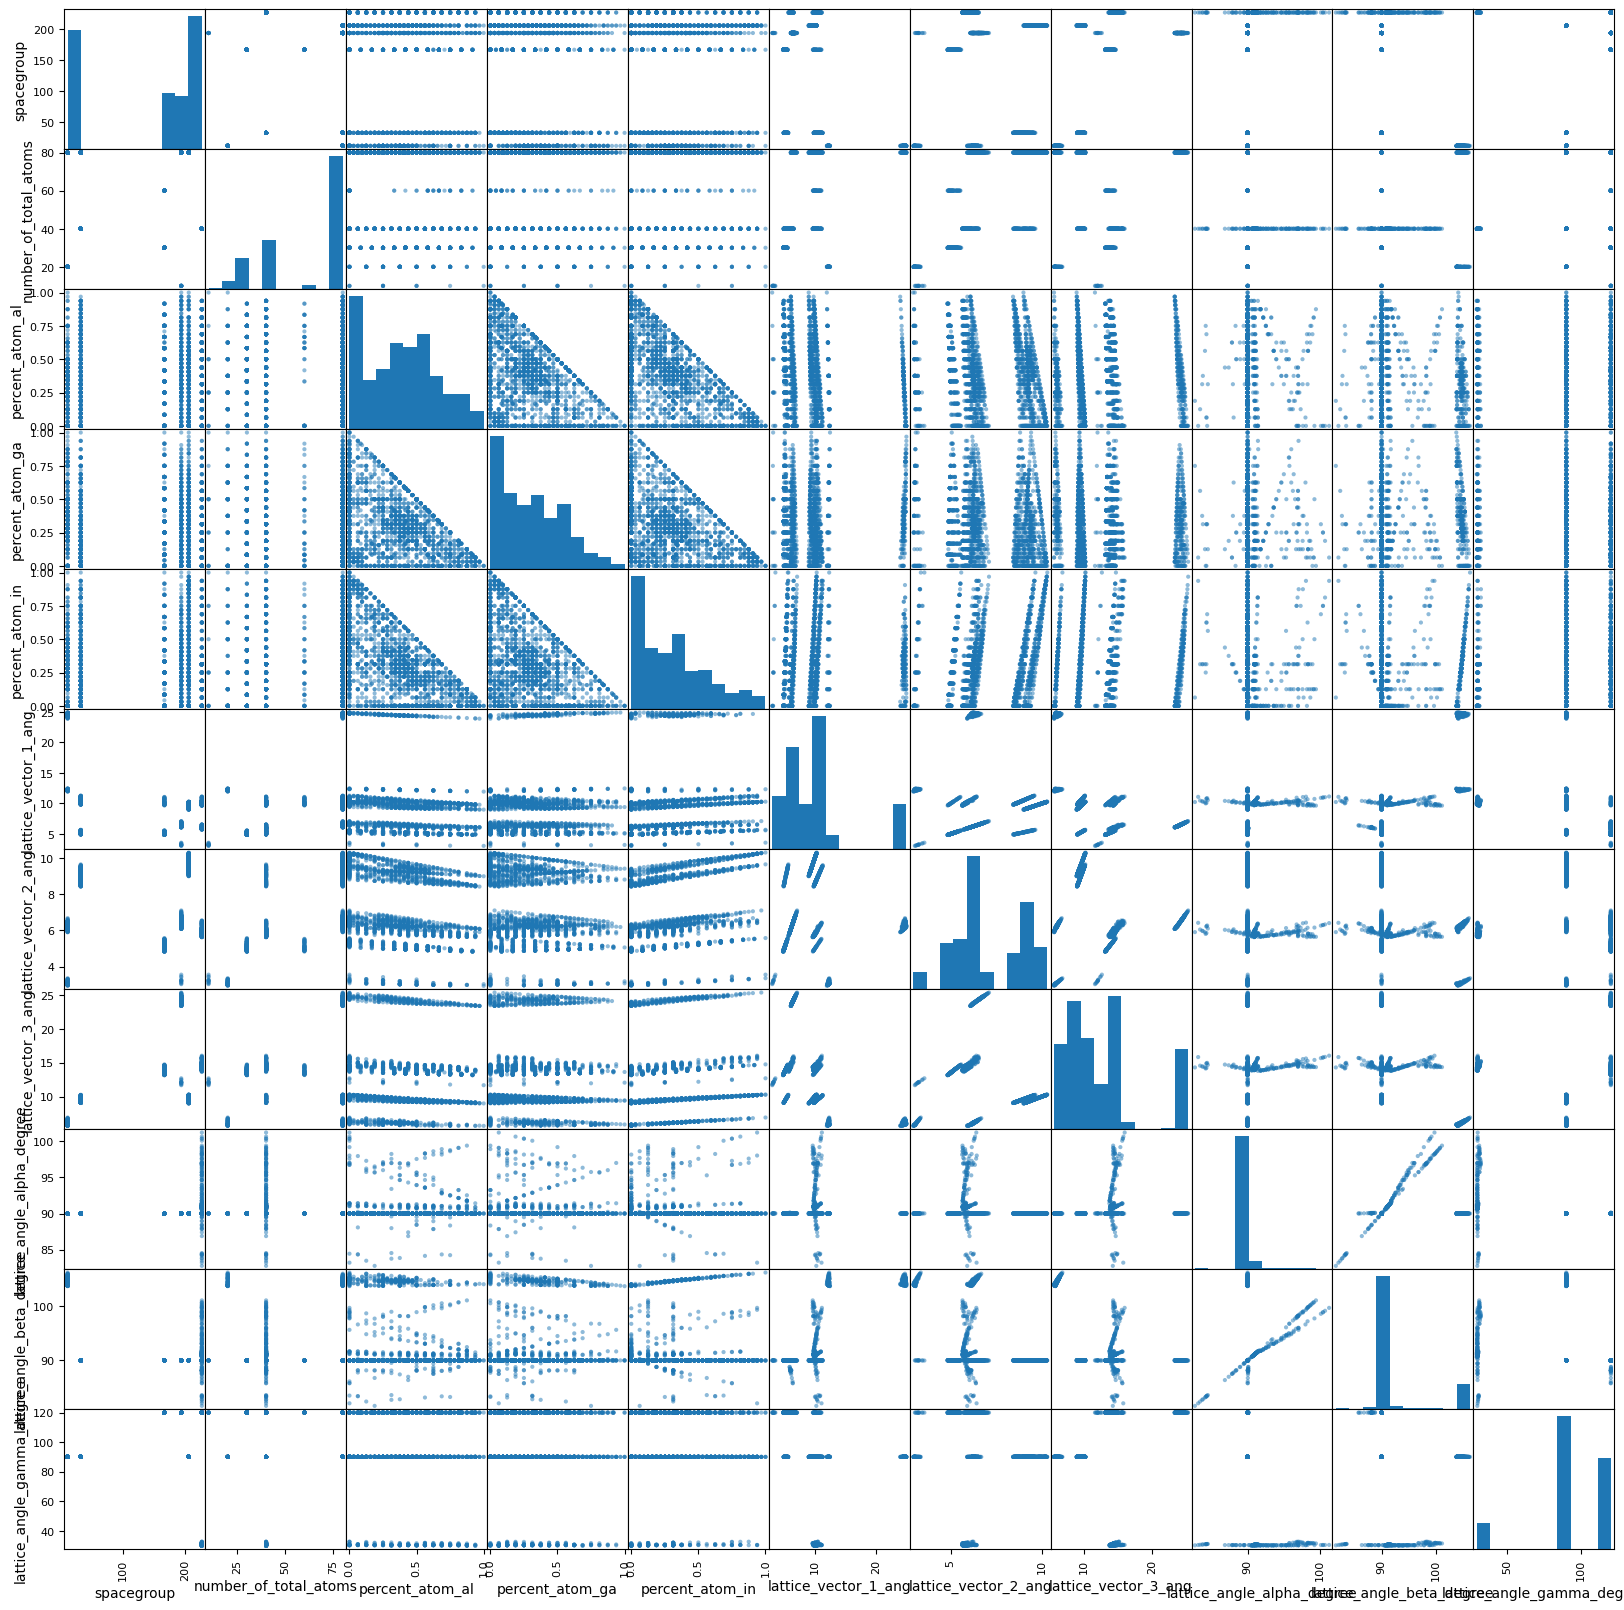

In [176]:
plt.figure(figsize=(30,30))
scatter_matrix(X,figsize=(20,20))
plt.show()

$\Large{\text{Correlation Matrix to find most correlated features}}$

In [177]:
print("Correlation Matrix:")


correlation = X.corr(method='spearman')

#Find the most correlated variables (excluding self-correlations)
#We will flatten the correlation matrix and filter out self-correlation
correlation_pairs = correlation.unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 0.98]  # Exclude self-correlation (value of 1)

#Sort by absolute value of correlation and take the top N pairs
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

#Print the most correlated variable pairs
print("\nMost Correlated Variable Pairs:")
top_n = 20  # You can change this value as needed
for idx, value in sorted_correlation_pairs.head(top_n).items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")


plt.figure(figsize=(100,100))
plt.title('Pearson\'s Rank Coefficient Heatmap', fontsize = 50)
sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix', annot_kws={"size": 50})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
print(correlation)

Correlation Matrix:

Most Correlated Variable Pairs:
number_of_total_atoms and lattice_vector_2_ang: 0.75
lattice_vector_2_ang and number_of_total_atoms: 0.75
percent_atom_al and percent_atom_in: 0.59
percent_atom_in and percent_atom_al: 0.59
lattice_angle_gamma_degree and lattice_vector_1_ang: 0.58
lattice_vector_1_ang and lattice_angle_gamma_degree: 0.58
spacegroup and lattice_vector_3_ang: 0.58
lattice_vector_3_ang and spacegroup: 0.58
lattice_angle_alpha_degree and spacegroup: 0.53
spacegroup and lattice_angle_alpha_degree: 0.53
lattice_vector_3_ang and lattice_vector_1_ang: 0.51
lattice_vector_1_ang and lattice_vector_3_ang: 0.51
number_of_total_atoms and lattice_vector_1_ang: 0.45
lattice_vector_1_ang and number_of_total_atoms: 0.45
lattice_vector_2_ang and lattice_angle_gamma_degree: 0.44
lattice_angle_gamma_degree and lattice_vector_2_ang: 0.44
lattice_angle_beta_degree and lattice_vector_2_ang: 0.44
lattice_vector_2_ang and lattice_angle_beta_degree: 0.44
percent_atom_ga and p

                            spacegroup  number_of_total_atoms  \
spacegroup                    1.000000              -0.069370   
number_of_total_atoms        -0.069370               1.000000   
percent_atom_al               0.056374              -0.107102   
percent_atom_ga              -0.082374               0.001856   
percent_atom_in              -0.000727               0.144471   
lattice_vector_1_ang         -0.299535               0.446099   
lattice_vector_2_ang          0.121415               0.748632   
lattice_vector_3_ang          0.577884              -0.212135   
lattice_angle_alpha_degree    0.531583               0.276008   
lattice_angle_beta_degree    -0.228268              -0.149146   
lattice_angle_gamma_degree   -0.277141              -0.279942   

                            percent_atom_al  percent_atom_ga  percent_atom_in  \
spacegroup                         0.056374        -0.082374        -0.000727   
number_of_total_atoms             -0.107102         0.001

In [178]:


norm_data = X.copy()

minVals = norm_data[norm_data.columns.tolist()].min()
maxVals = norm_data[norm_data.columns.tolist()].max()

for column in norm_data.columns.tolist():

    for i in range(len(norm_data)):
        value = norm_data.at[i, column]
   # Check if the value is not NaN before applying the normalization
        if pd.notna(value):
            # Normalize the value using Min-Max formula
            norm_data.at[i, column] = (float(value) - float(minVals[column])) / (float(maxVals[column]) - float(minVals[column]))

In [179]:
norm_data

spacegroup  number_of_total_atoms  percent_atom_al  percent_atom_ga  \
0       0.097674               1.000000           0.6250           0.3750   
1       0.846512               1.000000           0.6250           0.3750   
2       1.000000               0.428571           0.8125           0.1875   
3       0.720930               0.285714           0.7500           0.0000   
4       0.846512               1.000000           0.0000           0.6250   
...          ...                    ...              ...              ...   
2395    0.097674               0.428571           0.7500           0.2500   
2396    0.720930               0.285714           0.4167           0.5833   
2397    0.902326               1.000000           0.4375           0.5625   
2398    0.097674               1.000000           0.3125           0.1875   
2399    0.902326               1.000000           0.8750           0.0938   

      percent_atom_in  lattice_vector_1_ang  lattice_vector_2_ang  \
0              0.0000              0.316108              0.763337   
1              0.0000              0.143854              0.441140   
2              0.0000              0.306906              0.369788   
3              0.2500              0.089896              0.280498   
4              0.3750              0.165676              0.506111   
...               ...                   ...                   ...   
2395           0.0000              0.087304              0.756546   
2396           0.0000              0.087748              0.274075   
2397           0.0000              0.282652              0.854341   
2398           0.5000              0.348133              0.837384   
2399           0.0312              0.275539              0.833125   

      lattice_vector_3_ang  lattice_angle_alpha_degree  \
0                 0.178158                    0.392655   
1                 0.912710                    0.393520   
2                 0.421404                    0.444922   
3                 0.399487                    0.391908   
4                 0.961130                    0.392298   
...                    ...                         ...   
2395              0.175734                    0.392720   
2396              0.393692                    0.392179   
2397              0.180314                    0.392768   
2398              0.205784                    0.392595   
2399              0.172405                    0.392660   

      lattice_angle_beta_degree  lattice_angle_gamma_degree  
0                      0.340891                    0.667297  
1                      0.340716                    0.999435  
2                      0.386576                    0.008758  
3                      0.341282                    0.999427  
4                      0.340822                    0.999289  
...                         ...                         ...  
2395                   0.340891                    0.667294  
2396                   0.341103                    0.999415  
2397                   0.340985                    0.667227  
2398                   0.340781                    0.667282  
2399                   0.340948                    0.667263  

[2400 rows x 11 columns]

In [180]:
correlation = norm_data.corr(method='spearman')

#Find the most correlated variables (excluding self-correlations)
#We will flatten the correlation matrix and filter out self-correlation
correlation_pairs = correlation.unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 0.98]  # Exclude self-correlation (value of 1)

#Sort by absolute value of correlation and take the top N pairs
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

#Print the most correlated variable pairs
print("\nMost Correlated Variable Pairs:")
top_n = 20  # You can change this value as needed
for idx, value in sorted_correlation_pairs.head(top_n).items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")


plt.figure(figsize=(100,100))
plt.title('Pearson\'s Rank Coefficient Heatmap', fontsize = 50)
sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix', annot_kws={"size": 50})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
print(correlation)


Most Correlated Variable Pairs:
number_of_total_atoms and lattice_vector_2_ang: 0.75
lattice_vector_2_ang and number_of_total_atoms: 0.75
percent_atom_al and percent_atom_in: 0.59
percent_atom_in and percent_atom_al: 0.59
lattice_angle_gamma_degree and lattice_vector_1_ang: 0.58
lattice_vector_1_ang and lattice_angle_gamma_degree: 0.58
spacegroup and lattice_vector_3_ang: 0.58
lattice_vector_3_ang and spacegroup: 0.58
lattice_angle_alpha_degree and spacegroup: 0.53
spacegroup and lattice_angle_alpha_degree: 0.53
lattice_vector_3_ang and lattice_vector_1_ang: 0.51
lattice_vector_1_ang and lattice_vector_3_ang: 0.51
number_of_total_atoms and lattice_vector_1_ang: 0.45
lattice_vector_1_ang and number_of_total_atoms: 0.45
lattice_vector_2_ang and lattice_angle_gamma_degree: 0.44
lattice_angle_gamma_degree and lattice_vector_2_ang: 0.44
lattice_angle_beta_degree and lattice_vector_2_ang: 0.44
lattice_vector_2_ang and lattice_angle_beta_degree: 0.44
percent_atom_ga and percent_atom_al: 0.42

                            spacegroup  number_of_total_atoms  \
spacegroup                    1.000000              -0.069370   
number_of_total_atoms        -0.069370               1.000000   
percent_atom_al               0.056374              -0.107102   
percent_atom_ga              -0.082374               0.001856   
percent_atom_in              -0.000727               0.144471   
lattice_vector_1_ang         -0.299535               0.446099   
lattice_vector_2_ang          0.121415               0.748632   
lattice_vector_3_ang          0.577884              -0.212135   
lattice_angle_alpha_degree    0.531583               0.276008   
lattice_angle_beta_degree    -0.228268              -0.149146   
lattice_angle_gamma_degree   -0.277141              -0.279942   

                            percent_atom_al  percent_atom_ga  percent_atom_in  \
spacegroup                         0.056374        -0.082374        -0.000727   
number_of_total_atoms             -0.107102         0.001

$\Large{\text{Standardization (feature transformation)}}$

In [181]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [182]:
X_scaled

spacegroup  number_of_total_atoms  percent_atom_al  percent_atom_ga  \
0      -1.281235               0.810885         0.902265         0.284159   
1       0.619639               0.810885         0.902265         0.284159   
2       1.009259              -0.959526         1.608450        -0.518259   
3       0.300859              -1.402128         1.373055        -1.320676   
4       0.619639               0.810885        -1.451685         1.354050   
...          ...                    ...              ...              ...   
2395   -1.281235              -0.959526         1.373055        -0.250786   
2396    0.300859              -1.402128         0.117741         1.175592   
2397    0.761319               0.810885         0.196080         1.086577   
2398   -1.281235               0.810885        -0.274710        -0.518259   
2399    0.761319               0.810885         1.843845        -0.919254   

      percent_atom_in  lattice_vector_1_ang  lattice_vector_2_ang  \
0           -1.162707             -0.013767              0.774800   
1           -1.162707             -0.681399             -0.477888   
2           -1.162707             -0.049431             -0.755305   
3           -0.212653             -0.890531             -1.102459   
4            0.262374             -0.596817             -0.225287   
...               ...                   ...                   ...   
2395        -1.162707             -0.900576              0.748397   
2396        -1.162707             -0.898858             -1.127434   
2397        -1.162707             -0.143438              1.128622   
2398         0.737400              0.110359              1.062694   
2399        -1.044140             -0.171006              1.046132   

      lattice_vector_3_ang  lattice_angle_alpha_degree  \
0                -0.626795                   -0.180793   
1                 2.024991                   -0.168794   
2                 0.251341                    0.543833   
3                 0.172216                   -0.191143   
4                 2.199793                   -0.185743   
...                    ...                         ...   
2395             -0.635548                   -0.179893   
2396              0.151297                   -0.187393   
2397             -0.619015                   -0.179218   
2398             -0.527063                   -0.181618   
2399             -0.647567                   -0.180718   

      lattice_angle_beta_degree  lattice_angle_gamma_degree  
0                     -0.452319                   -0.185047  
1                     -0.453130                    0.974936  
2                     -0.240849                   -2.484970  
3                     -0.450507                    0.974905  
4                     -0.452640                    0.974426  
...                         ...                         ...  
2395                  -0.452319                   -0.185055  
2396                  -0.451338                    0.974867  
2397                  -0.451885                   -0.185291  
2398                  -0.452828                   -0.185098  
2399                  -0.452055                   -0.185163  

[2400 rows x 11 columns]

In [183]:
correlation = X_scaled.corr(method='spearman')

#Find the most correlated variables (excluding self-correlations)
#We will flatten the correlation matrix and filter out self-correlation
correlation_pairs = correlation.unstack()
correlation_pairs = correlation_pairs[correlation_pairs < 0.98]  # Exclude self-correlation (value of 1)

#Sort by absolute value of correlation and take the top N pairs
sorted_correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

#Print the most correlated variable pairs
print("\nMost Correlated Variable Pairs:")
top_n = 20  # You can change this value as needed
for idx, value in sorted_correlation_pairs.head(top_n).items():
    print(f"{idx[0]} and {idx[1]}: {value:.2f}")


plt.figure(figsize=(100,100))
plt.title('Pearson\'s Rank Coefficient Heatmap', fontsize = 50)
sns.heatmap(correlation, square=True,annot=True,cmap='cubehelix', annot_kws={"size": 50})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()
print(correlation)


Most Correlated Variable Pairs:
number_of_total_atoms and lattice_vector_2_ang: 0.75
lattice_vector_2_ang and number_of_total_atoms: 0.75
percent_atom_al and percent_atom_in: 0.59
percent_atom_in and percent_atom_al: 0.59
lattice_angle_gamma_degree and lattice_vector_1_ang: 0.58
lattice_vector_1_ang and lattice_angle_gamma_degree: 0.58
spacegroup and lattice_vector_3_ang: 0.58
lattice_vector_3_ang and spacegroup: 0.58
lattice_angle_alpha_degree and spacegroup: 0.53
spacegroup and lattice_angle_alpha_degree: 0.53
lattice_vector_3_ang and lattice_vector_1_ang: 0.51
lattice_vector_1_ang and lattice_vector_3_ang: 0.51
number_of_total_atoms and lattice_vector_1_ang: 0.45
lattice_vector_1_ang and number_of_total_atoms: 0.45
lattice_vector_2_ang and lattice_angle_gamma_degree: 0.44
lattice_angle_gamma_degree and lattice_vector_2_ang: 0.44
lattice_angle_beta_degree and lattice_vector_2_ang: 0.44
lattice_vector_2_ang and lattice_angle_beta_degree: 0.44
percent_atom_ga and percent_atom_al: 0.42

                            spacegroup  number_of_total_atoms  \
spacegroup                    1.000000              -0.069370   
number_of_total_atoms        -0.069370               1.000000   
percent_atom_al               0.056374              -0.107102   
percent_atom_ga              -0.082374               0.001856   
percent_atom_in              -0.000727               0.144471   
lattice_vector_1_ang         -0.299535               0.446099   
lattice_vector_2_ang          0.121415               0.748632   
lattice_vector_3_ang          0.577884              -0.212135   
lattice_angle_alpha_degree    0.531583               0.276008   
lattice_angle_beta_degree    -0.228268              -0.149146   
lattice_angle_gamma_degree   -0.277141              -0.279942   

                            percent_atom_al  percent_atom_ga  percent_atom_in  \
spacegroup                         0.056374        -0.082374        -0.000727   
number_of_total_atoms             -0.107102         0.001

<Figure size 3000x3000 with 0 Axes>

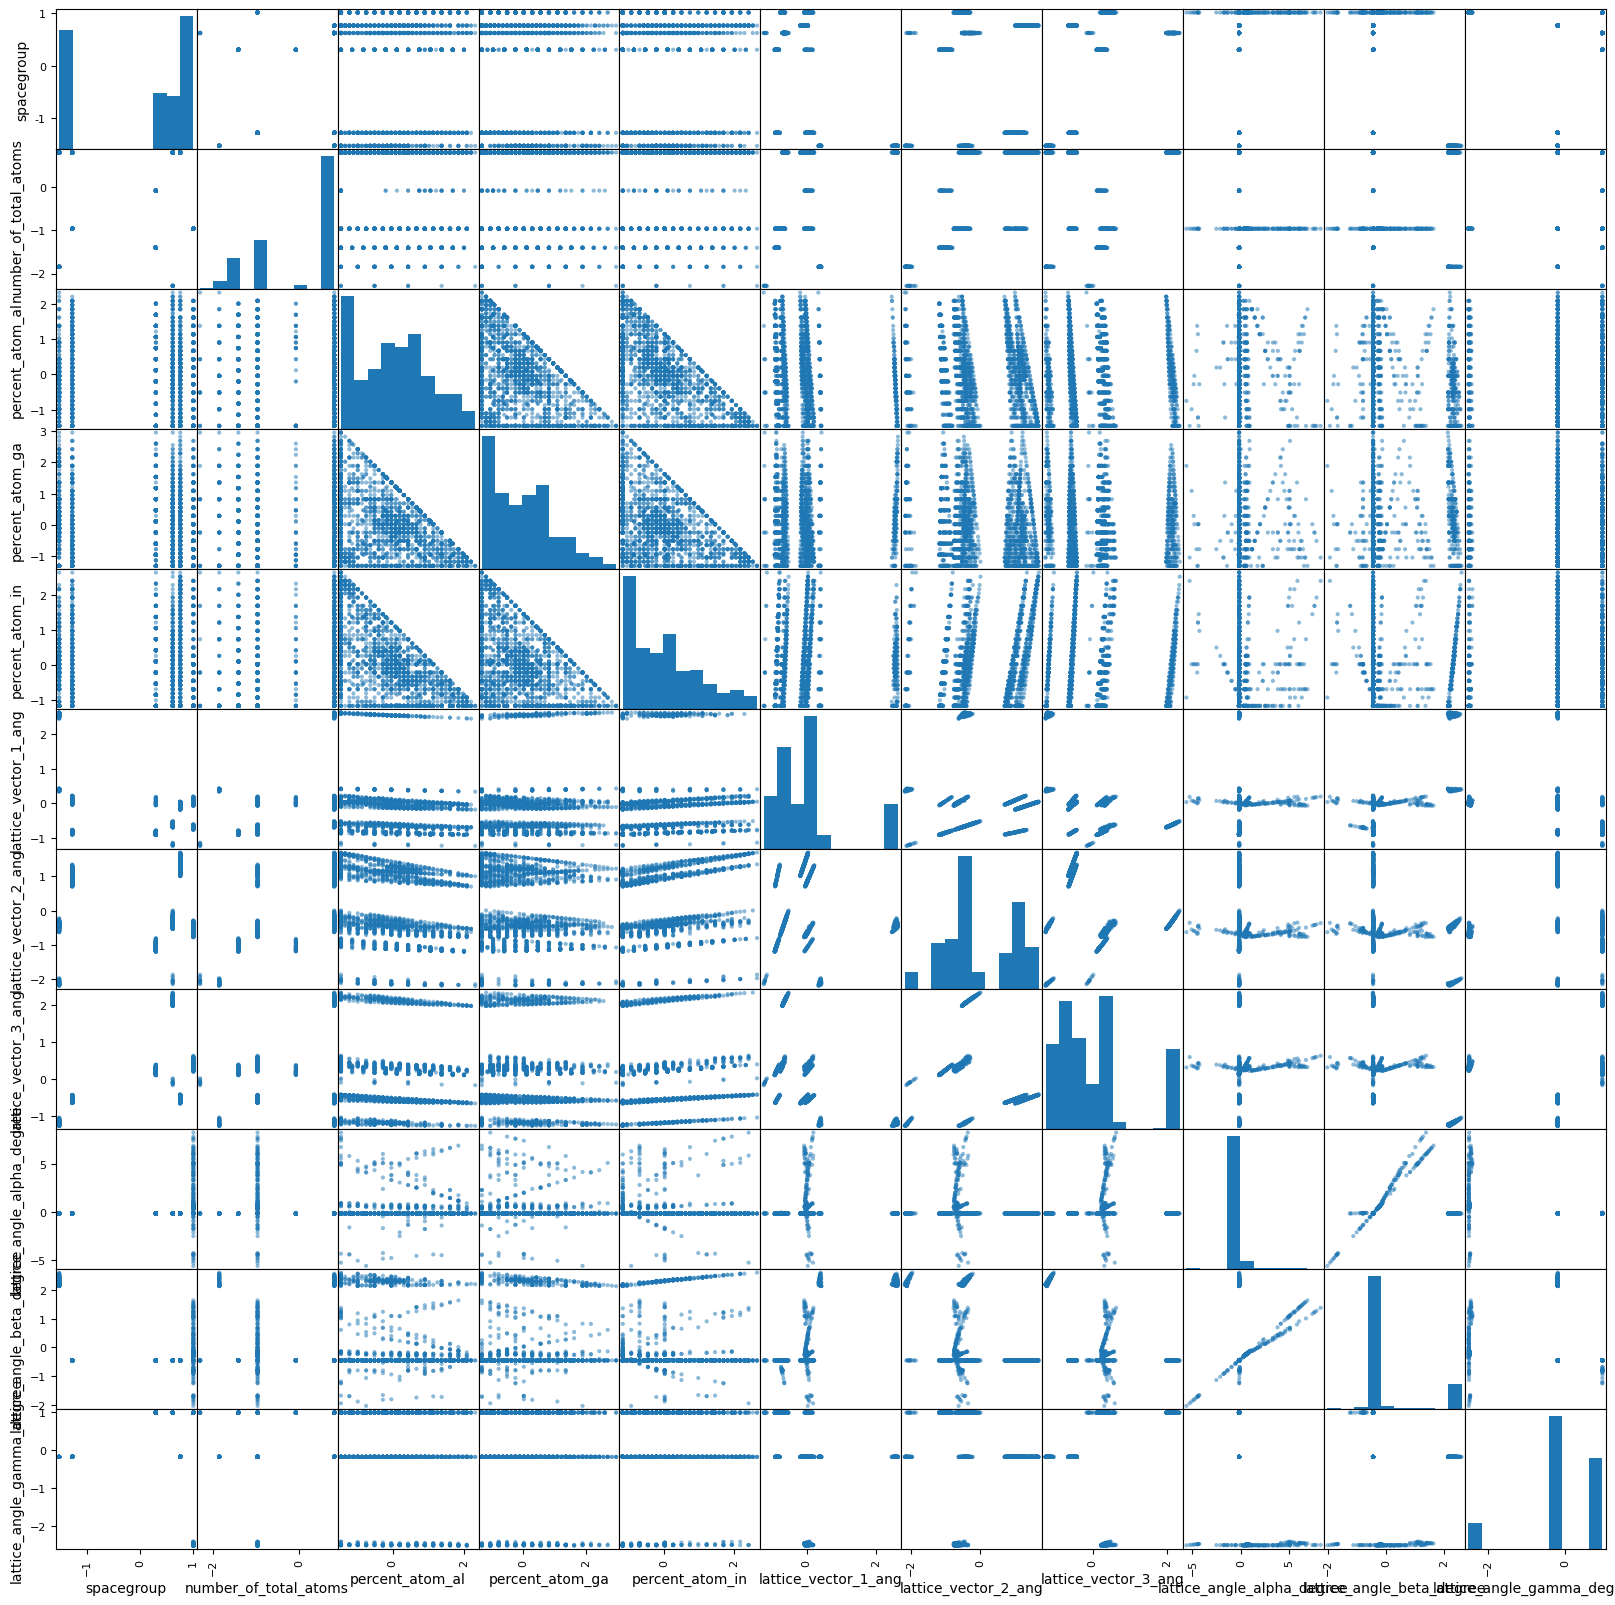

In [184]:
plt.figure(figsize=(30,30))
scatter_matrix(X_scaled,figsize=(20,20))
plt.show()

$\Large{\text{Mutual Information Analysis (feature selection)}}$

Feature ranking:
1. feature lattice_vector_3_ang = 1.000000
2. feature lattice_vector_2_ang = 0.924315
3. feature lattice_vector_1_ang = 0.664134
4. feature percent_atom_in = 0.488017
5. feature percent_atom_al = 0.425136
6. feature percent_atom_ga = 0.250561
7. feature lattice_angle_beta_degree = 0.171585
8. feature spacegroup = 0.127070
9. feature lattice_angle_alpha_degree = 0.116019
10. feature number_of_total_atoms = 0.089868
11. feature lattice_angle_gamma_degree = 0.042682


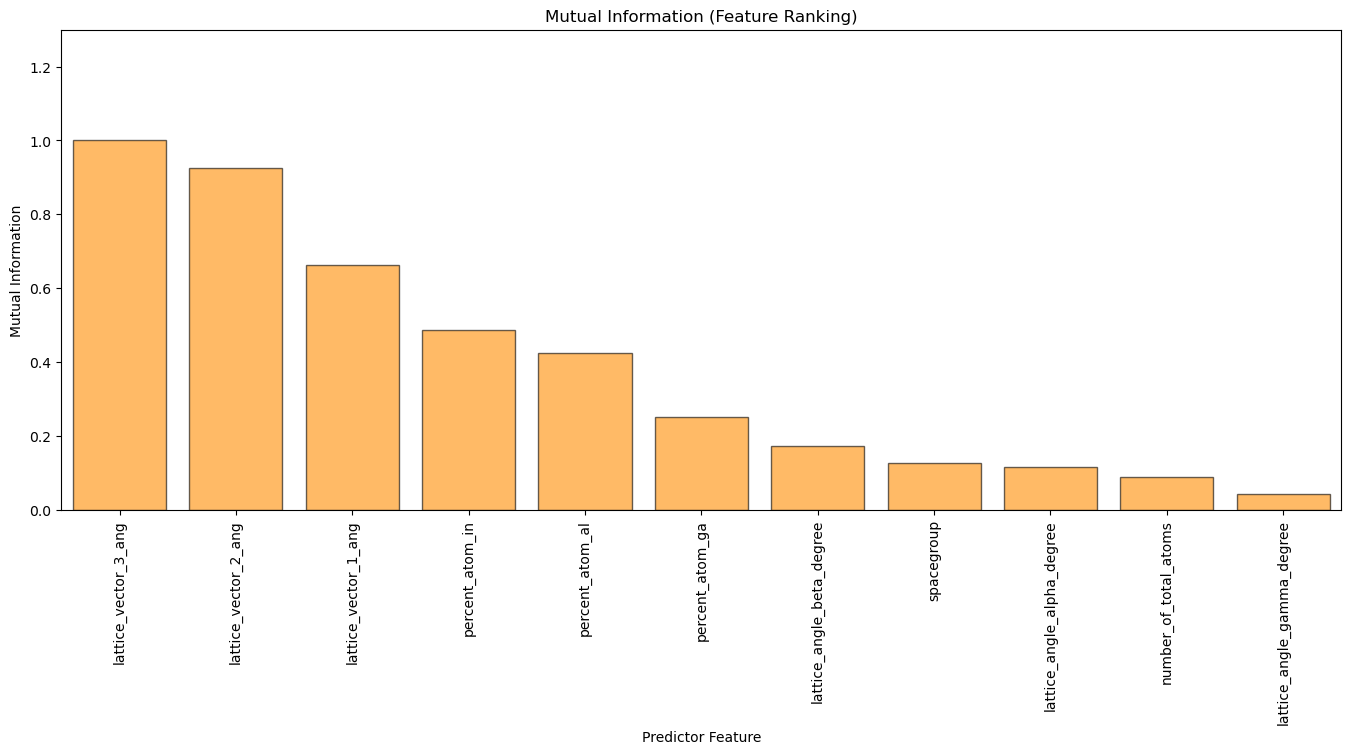

In [185]:
mi = mutual_info_regression(X_scaled,np.ravel(y))              # calculate mutual information
mi /= np.max(mi)                                        # calculate relative mutual information

mi_orig = mi

indices = np.argsort(mi)[::-1]                          # find indicies for descending order

print("Feature ranking:")                               # write out the feature importances
for f in range(X_scaled.shape[1]):
    print("%d. feature %s = %f" % (f + 1, X_scaled.columns[indices][f], mi[indices[f]]))

plt.subplot(111)                                        # plot the relative mutual information 
plt.title("Mutual Information (Feature Ranking)")
plt.bar(range(X_scaled.shape[1]), mi[indices],edgecolor = 'black',
       color="darkorange",alpha=0.6,align="center")
plt.xticks(range(X_scaled.shape[1]), X_scaled.columns[indices],rotation=90)
plt.xlim([-0.5, X_scaled.shape[1]-0.5]); plt.ylim([0,1.3])
#plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
#plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
#plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
plt.xlabel('Predictor Feature'); plt.ylabel('Mutual Information')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2., top=1., wspace=0.2, hspace=0.5)
plt.show()

$\Large{\text{Random Forest Model for feature ranking}}$

Feature Importances:
percent_atom_in: 0.5877
percent_atom_al: 0.1788
lattice_vector_3_ang: 0.1084
lattice_vector_1_ang: 0.0384
lattice_angle_alpha_degree: 0.0203
spacegroup: 0.0183
lattice_vector_2_ang: 0.0145
lattice_angle_gamma_degree: 0.0141
lattice_angle_beta_degree: 0.0119
percent_atom_ga: 0.0073
number_of_total_atoms: 0.0005


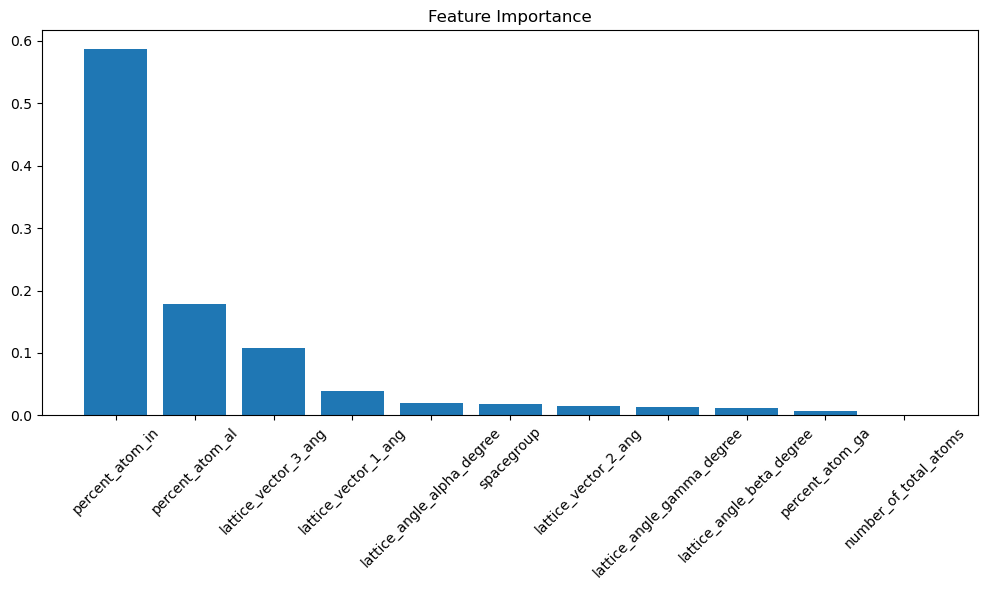

In [186]:
#Random forrest

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_scaled, y)
y_pred = rf_regressor.predict(X_scaled)

# Assuming X is a pandas DataFrame
feature_names = X_scaled.columns  # Extract column names

# Get feature importances
importances = rf_regressor.feature_importances_

# Pair feature names with their importance scores
feature_importance = zip(feature_names, importances)

# Sort features by importance
sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print sorted feature importance with column names
print("Feature Importances:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

# Convert to numpy array for sorting
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()



$\Large{\text{Removing certain indepenent variables}}$

In [187]:
y

0       3.4387
1       2.9210
2       2.7438
3       3.3492
4       1.3793
         ...  
2395    3.7349
2396    3.4915
2397    3.2750
2398    1.3915
2399    4.2107
Name: bandgap_energy_ev, Length: 2400, dtype: float64

In [188]:
X_copy = X_scaled.copy()
X_scaled = X_scaled.drop(columns = ['number_of_total_atoms'])
X_scaled

spacegroup  percent_atom_al  percent_atom_ga  percent_atom_in  \
0      -1.281235         0.902265         0.284159        -1.162707   
1       0.619639         0.902265         0.284159        -1.162707   
2       1.009259         1.608450        -0.518259        -1.162707   
3       0.300859         1.373055        -1.320676        -0.212653   
4       0.619639        -1.451685         1.354050         0.262374   
...          ...              ...              ...              ...   
2395   -1.281235         1.373055        -0.250786        -1.162707   
2396    0.300859         0.117741         1.175592        -1.162707   
2397    0.761319         0.196080         1.086577        -1.162707   
2398   -1.281235        -0.274710        -0.518259         0.737400   
2399    0.761319         1.843845        -0.919254        -1.044140   

      lattice_vector_1_ang  lattice_vector_2_ang  lattice_vector_3_ang  \
0                -0.013767              0.774800             -0.626795   
1                -0.681399             -0.477888              2.024991   
2                -0.049431             -0.755305              0.251341   
3                -0.890531             -1.102459              0.172216   
4                -0.596817             -0.225287              2.199793   
...                    ...                   ...                   ...   
2395             -0.900576              0.748397             -0.635548   
2396             -0.898858             -1.127434              0.151297   
2397             -0.143438              1.128622             -0.619015   
2398              0.110359              1.062694             -0.527063   
2399             -0.171006              1.046132             -0.647567   

      lattice_angle_alpha_degree  lattice_angle_beta_degree  \
0                      -0.180793                  -0.452319   
1                      -0.168794                  -0.453130   
2                       0.543833                  -0.240849   
3                      -0.191143                  -0.450507   
4                      -0.185743                  -0.452640   
...                          ...                        ...   
2395                   -0.179893                  -0.452319   
2396                   -0.187393                  -0.451338   
2397                   -0.179218                  -0.451885   
2398                   -0.181618                  -0.452828   
2399                   -0.180718                  -0.452055   

      lattice_angle_gamma_degree  
0                      -0.185047  
1                       0.974936  
2                      -2.484970  
3                       0.974905  
4                       0.974426  
...                          ...  
2395                   -0.185055  
2396                    0.974867  
2397                   -0.185291  
2398                   -0.185098  
2399                   -0.185163  

[2400 rows x 10 columns]

$\Large{\text{Building the Neural Network Model}}$

In [189]:
def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="relu", input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer="adam", loss="mae", metrics=["mae"])
    return model


$\Large{\text{Divide the dataset into training and testing}}$

In [190]:

# test train validation split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


X_train.head(10)



spacegroup  percent_atom_al  percent_atom_ga  percent_atom_in  \
482     0.300859        -1.451685         1.532507         0.103905   
1368    1.009259         1.373055        -1.320676        -0.212653   
2248    0.619639        -0.156824        -0.652209         0.737400   
857     0.761319        -0.627614        -1.187154         1.687454   
1017    0.761319        -1.334176         0.685582         0.737400   
2093    0.300859         1.059321        -0.607274        -0.529211   
993    -1.529175        -0.510105         0.819104        -0.212653   
2231    0.619639         1.490564        -0.518259        -1.044140   
2175   -1.281235         0.548984        -0.919254         0.262374   
509     0.761319         0.784756         0.417681        -1.162707   

      lattice_vector_1_ang  lattice_vector_2_ang  lattice_vector_3_ang  \
482              -0.849959             -0.981503              0.258021   
1368             -0.726063             -0.611808              0.343935   
2248             -0.600325             -0.235869              2.181791   
857              -0.009391              1.529059             -0.480069   
1017             -0.034744              1.453448             -0.506364   
2093             -0.894517             -1.114417              0.162693   
993               2.580629             -0.449263             -1.194817   
2231             -0.685598             -0.490481              2.010825   
2175              0.067678              0.961050             -0.561854   
509              -0.155043              1.093912             -0.631034   

      lattice_angle_alpha_degree  lattice_angle_beta_degree  \
482                    -0.182443                  -0.452810   
1368                   -0.119295                  -0.747055   
2248                   -0.171868                  -0.451621   
857                    -0.182143                  -0.452545   
1017                   -0.180568                  -0.452262   
2093                   -0.190243                  -0.450696   
993                    -0.182818                   2.273971   
2231                   -0.172018                  -0.452564   
2175                   -0.180343                  -0.452602   
509                    -0.179743                  -0.451941   

      lattice_angle_gamma_degree  
482                     0.974851  
1368                    0.976823  
2248                    0.974511  
857                    -0.185148  
1017                   -0.185260  
2093                    0.974894  
993                    -0.185109  
2231                    0.974983  
2175                   -0.185086  
509                    -0.185248

$\Large{\text{Training process and Bootstrapping to find MAE error}}$

In [191]:
test_data_copy = test_data.copy()
test_data = test_data.drop(columns = ['id', 'number_of_total_atoms'])
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)
test_data


spacegroup  percent_atom_al  percent_atom_ga  percent_atom_in  \
0     -1.245661        -0.672619         0.633833         0.101962   
1     -1.245661         1.389169        -0.257915        -1.146007   
2      0.320400         1.083841        -0.597414        -0.540898   
3     -1.491088         0.701906         0.506266        -1.146007   
4     -1.491088        -0.672619         0.760993        -0.011655   
..          ...              ...              ...              ...   
595   -1.491088        -1.359882         1.143286         0.328469   
596   -1.245661        -0.901707        -1.276822         2.030179   
597    0.635949        -1.359882        -0.257915         1.576438   
598   -1.245661         0.930994        -1.276822         0.215215   
599    0.776193         0.014643         0.124379        -0.125272   

     lattice_vector_1_ang  lattice_vector_2_ang  lattice_vector_3_ang  \
0                0.077071              0.984280             -0.516047   
1               -0.035758              0.723122             -0.609149   
2               -0.896069             -1.070193              0.190780   
3                2.493530             -0.546400             -1.228445   
4                2.547345             -0.403010             -1.155460   
..                    ...                   ...                   ...   
595              2.577150             -0.349118             -1.130746   
596             -0.791487              1.224095             -0.428774   
597             -0.553430             -0.073647              2.320969   
598             -0.860520              0.908790             -0.541883   
599             -0.105439              1.229545             -0.541883   

     lattice_angle_alpha_degree  lattice_angle_beta_degree  \
0                     -0.160087                  -0.459878   
1                     -0.156070                  -0.459508   
2                     -0.169589                  -0.457917   
3                     -0.160282                   2.103997   
4                     -0.159793                   2.239944   
..                          ...                        ...   
595                   -0.159597                   2.273321   
596                   -0.159009                  -0.460545   
597                   -0.152740                  -0.462154   
598                   -0.155776                  -0.459767   
599                   -0.156952                  -0.459360   

     lattice_angle_gamma_degree  
0                     -0.263534  
1                     -0.263497  
2                      0.985298  
3                     -0.263551  
4                     -0.263555  
..                          ...  
595                   -0.263555  
596                   -0.263543  
597                    0.984644  
598                   -0.263530  
599                   -0.263688  

[600 rows x 10 columns]

In [192]:
y_test

2037    1.6845
1978    2.1632
855     3.7127
1719    3.1032
2019    3.2116
         ...  
208     1.4562
2196    2.9070
402     3.4215
2341    2.2154
840     3.0469
Name: bandgap_energy_ev, Length: 240, dtype: float64

In [134]:
n_bootstraps = 100
bootstrap_maes = []

for i in range(n_bootstraps):
    # Create bootstrap dataset
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap, y_bootstrap = X_train.iloc[indices], y_train.iloc[indices]
    
    # Train and predict with TensorFlow model
    model = build_model(X_train.shape[1])
    model.fit(X_bootstrap, y_bootstrap, epochs=50, batch_size=32, verbose=0)
    preds = model.predict(X_test).flatten()
    
    # Evaluate MAE
    mae = mean_absolute_error(y_test, preds)
    bootstrap_maes.append(mae)
    print(f'{i}/{n_bootstraps}')
# finding the mean error
mean_mae = np.mean(bootstrap_maes)
std_mae = np.std(bootstrap_maes)

# Goodness Factor
print(f"Mean MAE: {mean_mae:.4f}, Standard Deviation of MAE: {std_mae:.4f}")

print(preds)


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
0/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
7/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
9/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
10/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
11/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
12/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
13/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
14/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
15/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
16/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
17/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
18/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
19/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
20/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
21/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
22/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
23/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
24/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
25/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
26/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
27/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
28/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
29/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
30/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
31/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
32/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
33/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
34/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
35/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
36/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
37/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
38/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
39/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
40/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
41/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
42/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
43/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
44/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
45/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
46/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
47/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
48/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
49/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
50/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
51/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
52/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
53/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
54/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
55/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
56/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
57/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
58/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
59/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
60/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
61/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
62/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
63/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
64/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
65/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
66/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
67/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
68/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
69/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
70/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
71/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
72/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
73/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
74/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
75/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
76/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
77/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
78/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
79/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
80/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
81/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
82/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
83/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
84/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
85/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
86/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
87/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
88/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
89/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
90/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
91/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
92/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
93/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
94/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
95/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
96/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
97/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
98/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
99/100
Mean MAE: 0.1378, Standard Deviation of MAE: 0.0055
[1.5845689  2.123045   3.8300087  3.416368   3.1268091  1.8772614
 0.3673657  1.3233103  1.8213828  2.1335955  1.8953023  1.1255381
 2.9223318  1.5292943  3.0226498  4.0477695  1.9663091  4.301917
 3.900781   0.851531   1.4866835  0.4183034  1.6644962  1.092869
 1.0719472  3.6771388  1.2427757  2.6786332  1.2941076  0.7680454
 2.6992497  1.0213802  1.2471043  1.4893914  3.4951668  3.2397265
 2.9535308  1.8638333  1.534972   1.1042778  2.0485647  1.6112735
 3.9260027  0.90543866 1.7297006  2.947656   1.6021882  2.0537336
 2.173276   1.876184   2.6747174  3.6771388  2.1705723  3.6771388
 1.1250491  1.1889985  3.0501623  3.5549605  2.0670607  1.1419885
 2.4083364  1.8748758  2.0556276  1.817398   1.6910104  2.8462715
 2.363545   2.3108792  3.6008854  1.1657937  2.8737707  1.1889985
 1.2761996  0.92850184 2.312895   1.7410481  4.0477695  1.0473121
 2.0485647  0.8550701  2.7628183  1.3699098  1.

In [139]:
len(y_test), len(preds)

(240, 240)

In [154]:
n = np.linspace(1,6,100)
print(n)

[1.         1.05050505 1.1010101  1.15151515 1.2020202  1.25252525
 1.3030303  1.35353535 1.4040404  1.45454545 1.50505051 1.55555556
 1.60606061 1.65656566 1.70707071 1.75757576 1.80808081 1.85858586
 1.90909091 1.95959596 2.01010101 2.06060606 2.11111111 2.16161616
 2.21212121 2.26262626 2.31313131 2.36363636 2.41414141 2.46464646
 2.51515152 2.56565657 2.61616162 2.66666667 2.71717172 2.76767677
 2.81818182 2.86868687 2.91919192 2.96969697 3.02020202 3.07070707
 3.12121212 3.17171717 3.22222222 3.27272727 3.32323232 3.37373737
 3.42424242 3.47474747 3.52525253 3.57575758 3.62626263 3.67676768
 3.72727273 3.77777778 3.82828283 3.87878788 3.92929293 3.97979798
 4.03030303 4.08080808 4.13131313 4.18181818 4.23232323 4.28282828
 4.33333333 4.38383838 4.43434343 4.48484848 4.53535354 4.58585859
 4.63636364 4.68686869 4.73737374 4.78787879 4.83838384 4.88888889
 4.93939394 4.98989899 5.04040404 5.09090909 5.14141414 5.19191919
 5.24242424 5.29292929 5.34343434 5.39393939 5.44444444 5.4949

$\Large{\text{Plotting the predicted energies for the test data and the actual energies from the test data}}$

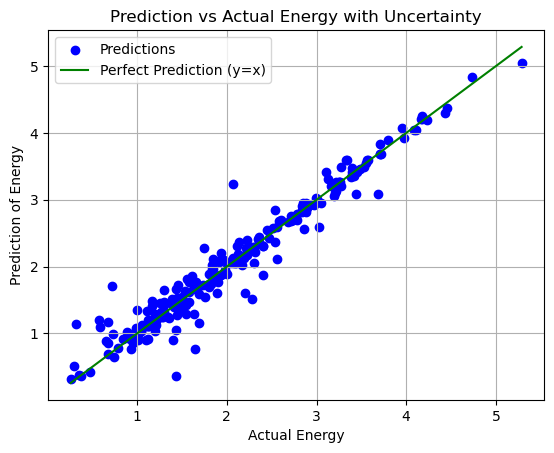

In [235]:

# Add error bars to the plot
plt.figure(2)
plt.scatter(y_test, preds, label="Predictions", color="blue")

# Plot a perfect prediction line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="green", label="Perfect Prediction (y=x)")

# Labels and legend
plt.xlabel("Actual Energy")
plt.ylabel("Prediction of Energy")
plt.title("Prediction vs Actual Energy with Uncertainty")
plt.legend()
plt.grid(True)
plt.show()


$\Large{\text{Visualizing whether the predicted energy value from the model}}$
$\Large{\text{is within 1 standard deviation of the actual energy values}}$

198 out of 240 predicted values come relatively close to the true value, as their residual falls within 1 SD from 0
0.825 accuracy


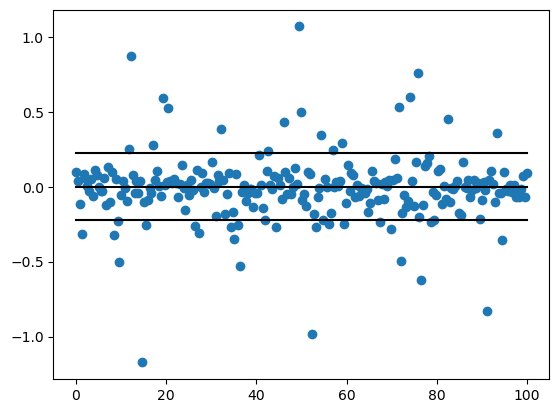

In [234]:
residuals = y_test - preds
r_sd = np.std(residuals)
accept = [i for i in residuals if abs(i) <= r_sd]
n = np.linspace(0, 100, len(residuals))

plt.scatter(n, residuals)
plt.plot(n, [0] * len(n), color = 'black')
plt.plot(n, [r_sd] * len(n), color = 'black')
plt.plot(n, [-r_sd] * len(n), color = 'black')

print(f'{len(accept)} out of {len(preds)} predicted values come relatively close to the true value, as their residual falls within 1 SD from 0')
print(f'{198/240} accuracy')

$\Large{\text{Training process and Bootstrapping to find MSE error}}$

In [167]:
n_bootstraps = 100
bootstrap_mses_2 = []

for i in range(n_bootstraps):
    # Create bootstrap dataset
    indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
    X_bootstrap, y_bootstrap = X_train.iloc[indices], y_train.iloc[indices]
    
    # Train and predict with TensorFlow model
    model = build_model(X_train.shape[1])
    model.fit(X_bootstrap, y_bootstrap, epochs=50, batch_size=32, verbose=0)
    preds2 = model.predict(X_test).flatten()
    
    # Evaluate MSE
    mse = mean_squared_error(y_test, preds2)
    bootstrap_mses_2.append(mse)
    print(f'{i}/{n_bootstraps}')
# Aggregate MSE results
mean_mae2 = np.mean(bootstrap_mses_2)
std_mae2 = np.std(bootstrap_mses_2)

# Goodness Factor
print(f"Mean MAE: {mean_mae2:.4f}, Standard Deviation of MAE: {std_mae2:.4f}")

print(preds2)



/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
0/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
5/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
9/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
10/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
11/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
12/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
14/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
15/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
16/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
17/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
18/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
19/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
20/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
21/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
22/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
24/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
25/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
26/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
27/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
29/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
30/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
31/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
32/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
33/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
34/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
35/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
36/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
37/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
38/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
39/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
40/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
41/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
42/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
43/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
44/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
45/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
46/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
47/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
48/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
49/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
50/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
51/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
52/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
53/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
54/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
55/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
56/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
57/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
58/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
59/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
60/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
61/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
62/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
63/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
64/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
65/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
66/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
67/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
68/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
69/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
70/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
71/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
72/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
73/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
74/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
75/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
76/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
77/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
78/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
79/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
80/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
81/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
82/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
83/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
84/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
85/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
86/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
87/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
88/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
89/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
90/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
91/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
92/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
93/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
94/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
95/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
96/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
97/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
98/100


/Users/boi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
99/100
Mean MAE: 0.0510, Standard Deviation of MAE: 0.0036
[1.7170466  2.0768564  3.7559109  3.3618143  2.9894826  1.9975338
 0.3398445  1.2688115  1.6489795  2.0277374  2.011306   1.082401
 2.8244915  1.4293886  3.0430758  3.9726617  1.8955519  4.3062716
 3.86492    0.977165   1.4040748  0.37207285 1.5661194  0.7504854
 0.95523524 3.6653123  1.234977   2.5521677  1.3470573  0.9378004
 2.6572483  0.95690906 1.1672955  1.3634992  3.459215   3.3378963
 2.9880867  1.7896881  1.469182   1.164659   2.0242465  1.6448021
 3.9189732  0.930135   1.6823752  2.8607352  1.5565661  2.1485233
 2.1412148  1.8431599  2.640398   3.6653123  2.0951884  3.6653123
 1.1850967  1.1810452  3.1528254  3.4298446  2.1530962  1.1826389
 2.3149407  1.8156404  1.9503665  1.7689381  1.6221282  2.6054957
 2.2934976  2.338735   3.6371028  1.0740136  2.8391228  1.1810452
 1.3348317  0.9256588  2.2350013  1.6827006  3.9726617  1.2007725
 2.0242465  0.6962949  2.6518736  1.3847935  1

$\Large{\text{Plotting the predicted energies for the test data and the actual energies from the test data}}$

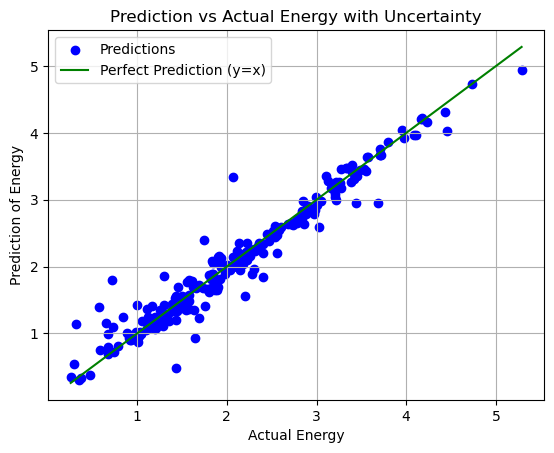

In [237]:

# Add error bars to the plot
plt.figure(2)
plt.scatter(y_test, preds2, label="Predictions", color="blue")

# Plot a perfect prediction line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="green", label="Perfect Prediction (y=x)")

# Labels and legend
plt.xlabel("Actual Energy")
plt.ylabel("Prediction of Energy")
plt.title("Prediction vs Actual Energy with Uncertainty")
plt.legend()
plt.grid(True)
plt.show()



$\Large{\text{Visualizing whether the predicted energy value from the model}}$
$\Large{\text{is within 1 standard deviation of the actual energy values}}$

203 out of 240 predicted values come relatively close to the true value, as their residual falls within 1 SD from 0
0.825 accuracy


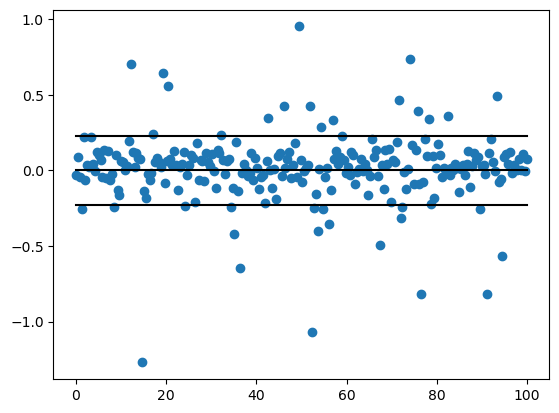

In [238]:
residuals = y_test - preds2
r_sd = np.std(residuals)
accept = [i for i in residuals if abs(i) <= r_sd]
n = np.linspace(0, 100, len(residuals))

plt.scatter(n, residuals)
plt.plot(n, [0] * len(n), color = 'black')
plt.plot(n, [r_sd] * len(n), color = 'black')
plt.plot(n, [-r_sd] * len(n), color = 'black')

print(f'{len(accept)} out of {len(preds2)} predicted values come relatively close to the true value, as their residual falls within 1 SD from 0')
print(f'{198/240} accuracy')